<a href="https://colab.research.google.com/github/bouchrabenkhelifa/PFE-Exp03-Time-Series/blob/main/Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

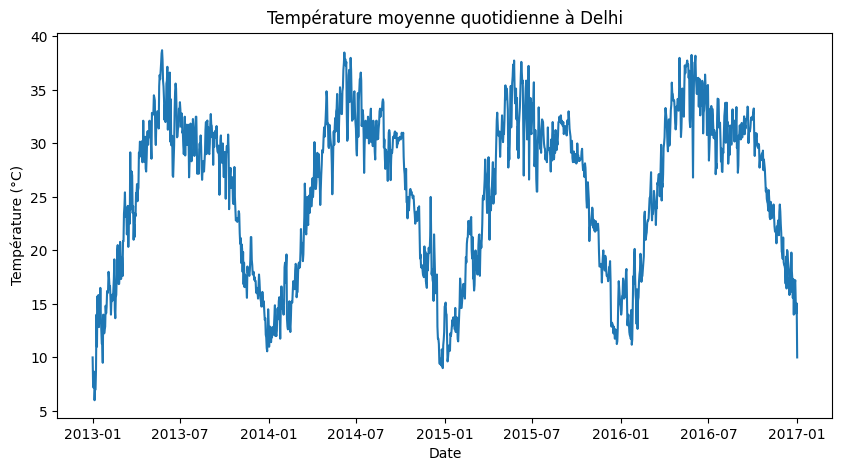

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("data.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Visualiser la série
plt.figure(figsize=(10,5))
plt.plot(df['meantemp'])
plt.title("Température moyenne quotidienne à Delhi")
plt.xlabel("Date")
plt.ylabel("Température (°C)")
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


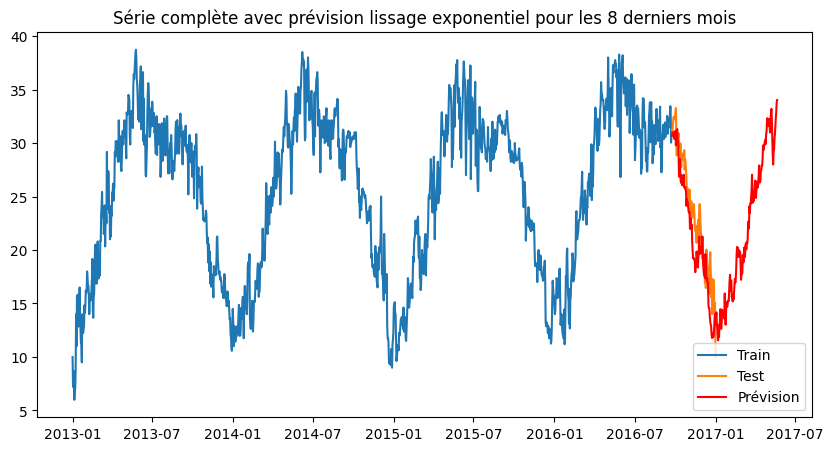

RMSE lissage exponentiel : 2.639995966723144 degré


In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math



# Modèle Holt-Winters
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365)
fit = model.fit()
forecast = fit.forecast(240)

# Visualisation
plt.figure(figsize=(10,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prévision', color='red')
plt.legend()
plt.title("Série complète avec prévision lissage exponentiel pour les 8 derniers mois")
plt.show()

# Calcul du RMSE
rmse_hw = math.sqrt(mean_squared_error(test, forecast[:len(test)]))
print("RMSE lissage exponentiel :", rmse_hw ,"degré")


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Charger le dataset
df = pd.read_csv('data.csv')

# Garde uniquement les colonnes nécessaires
df = df[['date', 'meantemp']]
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Normalisation (important pour les réseaux de neurones)
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Transformation en série supervisée
def create_dataset(series, look_back=30):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:i+look_back])
        y.append(series[i+look_back])
    return np.array(X), np.array(y)

look_back = 30  # nombre de jours de contexte
X, y = create_dataset(df_scaled, look_back)


In [29]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Adapter la forme pour RNN (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [45]:
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(look_back, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1213 - val_loss: 0.0052
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0040 - val_loss: 0.0031
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0029 - val_loss: 0.0026


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


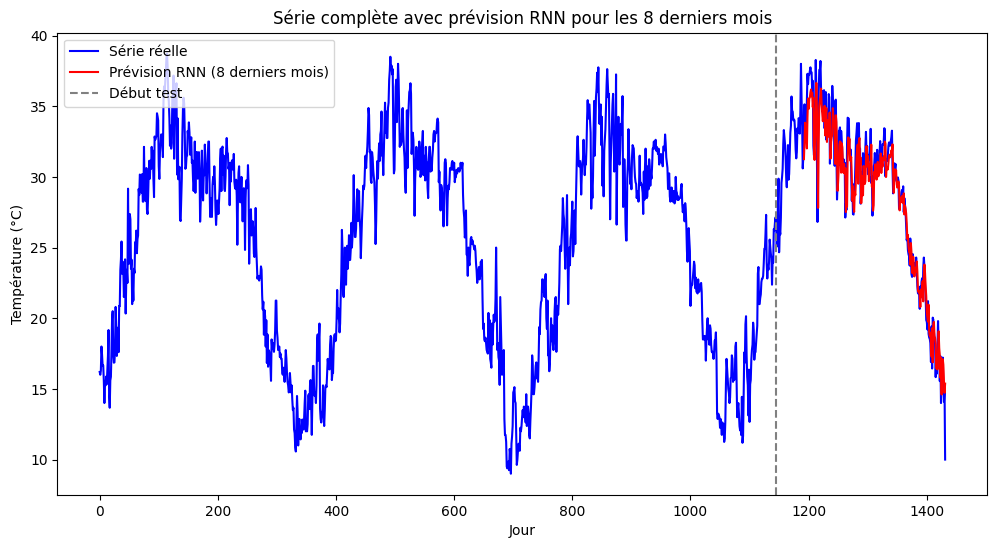

RMSE RNN : 1.7020306375934935


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

# Prédictions RNN
y_pred = model.predict(X_test)

# Inverser la normalisation
y_train_inv = scaler.inverse_transform(y_train.reshape(-1,1))
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Série complète
full_series = np.concatenate((y_train_inv, y_test_inv), axis=0)

# 8 derniers mois (≈240 jours)
n_days_total = len(full_series)
n_last_months = 8
n_pred = int(30 * n_last_months)
n_pred = min(n_pred, len(y_pred_inv))

# Corrigé : np.full en 2D pour que les dimensions correspondent
pred_series = np.concatenate(
    (np.full((n_days_total - n_pred, 1), np.nan), y_pred_inv[-n_pred:]),
    axis=0
)

# Graphique
plt.figure(figsize=(12,6))
plt.plot(full_series, label='Série réelle', color='blue')
plt.plot(pred_series, label='Prévision RNN (8 derniers mois)', color='red')
plt.axvline(x=len(y_train_inv), color='gray', linestyle='--', label='Début test')
plt.legend()
plt.title("Série complète avec prévision RNN pour les 8 derniers mois")
plt.xlabel("Jour")
plt.ylabel("Température (°C)")
plt.show()

# RMSE
rmse_rnn = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print("RMSE RNN :", rmse_rnn)
